In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = np.load('neutrino0523n1000000.npz')

In [3]:
# Splitting 
n = 1000000

cpv = data['cpv'][:n]

ve_dune = data['ve_dune'][:n]
vu_dune = data['vu_dune'][:n]
vebar_dune = data['vebar_dune'][:n]
vubar_dune = data['vubar_dune'][:n]


ve_t2hk = data['ve_t2hk'][:n]
vu_t2hk = data['vu_t2hk'][:n]
vebar_t2hk = data['vebar_t2hk'][:n]
vubar_t2hk = data['vubar_t2hk'][:n]

ve2_dune = np.hstack((ve_dune,vebar_dune))[:n] #合併ve和ve_bar
ve2_t2hk = np.hstack((ve_t2hk,vebar_t2hk))[:n] #合併ve和ve_bar
ve4 = np.hstack((ve_dune,vebar_dune,ve_t2hk,vebar_t2hk))[:n] #合併ve和ve_bar


from sklearn.model_selection import train_test_split
ve_dune_train, ve_dune_test, cpv_train_ve_dune, cpv_test_ve_dune = train_test_split(ve_dune, cpv, test_size=0.10, random_state=32)
vu_dune_train, vu_dune_test, cpv_train_vu_dune, cpv_test_vu_dune = train_test_split(vu_dune, cpv, test_size=0.10, random_state=32)
vebar_dune_train, vebar_dune_test, cpv_train_vebar_dune, cpv_test_vebar_dune = train_test_split(vebar_dune, cpv, test_size=0.10, random_state=32)
vubar_dune_train, vubar_dune_test, cpv_train_vubar_dune, cpv_test_vubar_dune = train_test_split(vubar_dune, cpv, test_size=0.10, random_state=32)


ve_t2hk_train, ve_t2hk_test, cpv_train_ve_t2hk, cpv_test_ve_t2hk = train_test_split(ve_t2hk, cpv, test_size=0.10, random_state=32)
vu_t2hk_train, vu_t2hk_test, cpv_train_vu_t2hk, cpv_test_vu_t2hk = train_test_split(vu_t2hk, cpv, test_size=0.10, random_state=32)
vebar_t2hk_train, vebar_t2hk_test, cpv_train_vebar_t2hk, cpv_test_vebar_t2hk = train_test_split(vebar_t2hk, cpv, test_size=0.10, random_state=32)
vubar_t2hk_train, vubar_t2hk_test, cpv_train_vubar_t2hk, cpv_test_vubar_t2hk = train_test_split(vubar_t2hk, cpv, test_size=0.10, random_state=32)

ve2_dune_train, ve2_dune_test, cpv_train_ve2_dune, cpv_test_ve2_dune = train_test_split(ve2_dune, cpv, test_size=0.10, random_state=32)
ve2_t2hk_train, ve2_t2hk_test, cpv_train_ve2_t2hk, cpv_test_ve2_t2hk = train_test_split(ve2_t2hk, cpv, test_size=0.10, random_state=32)
ve4_train, ve4_test, cpv_train_ve4, cpv_test_ve4 = train_test_split(ve4, cpv, test_size=0.10, random_state=32)



Training Score:  0.9140811111111111
Testing Score:  0.91497


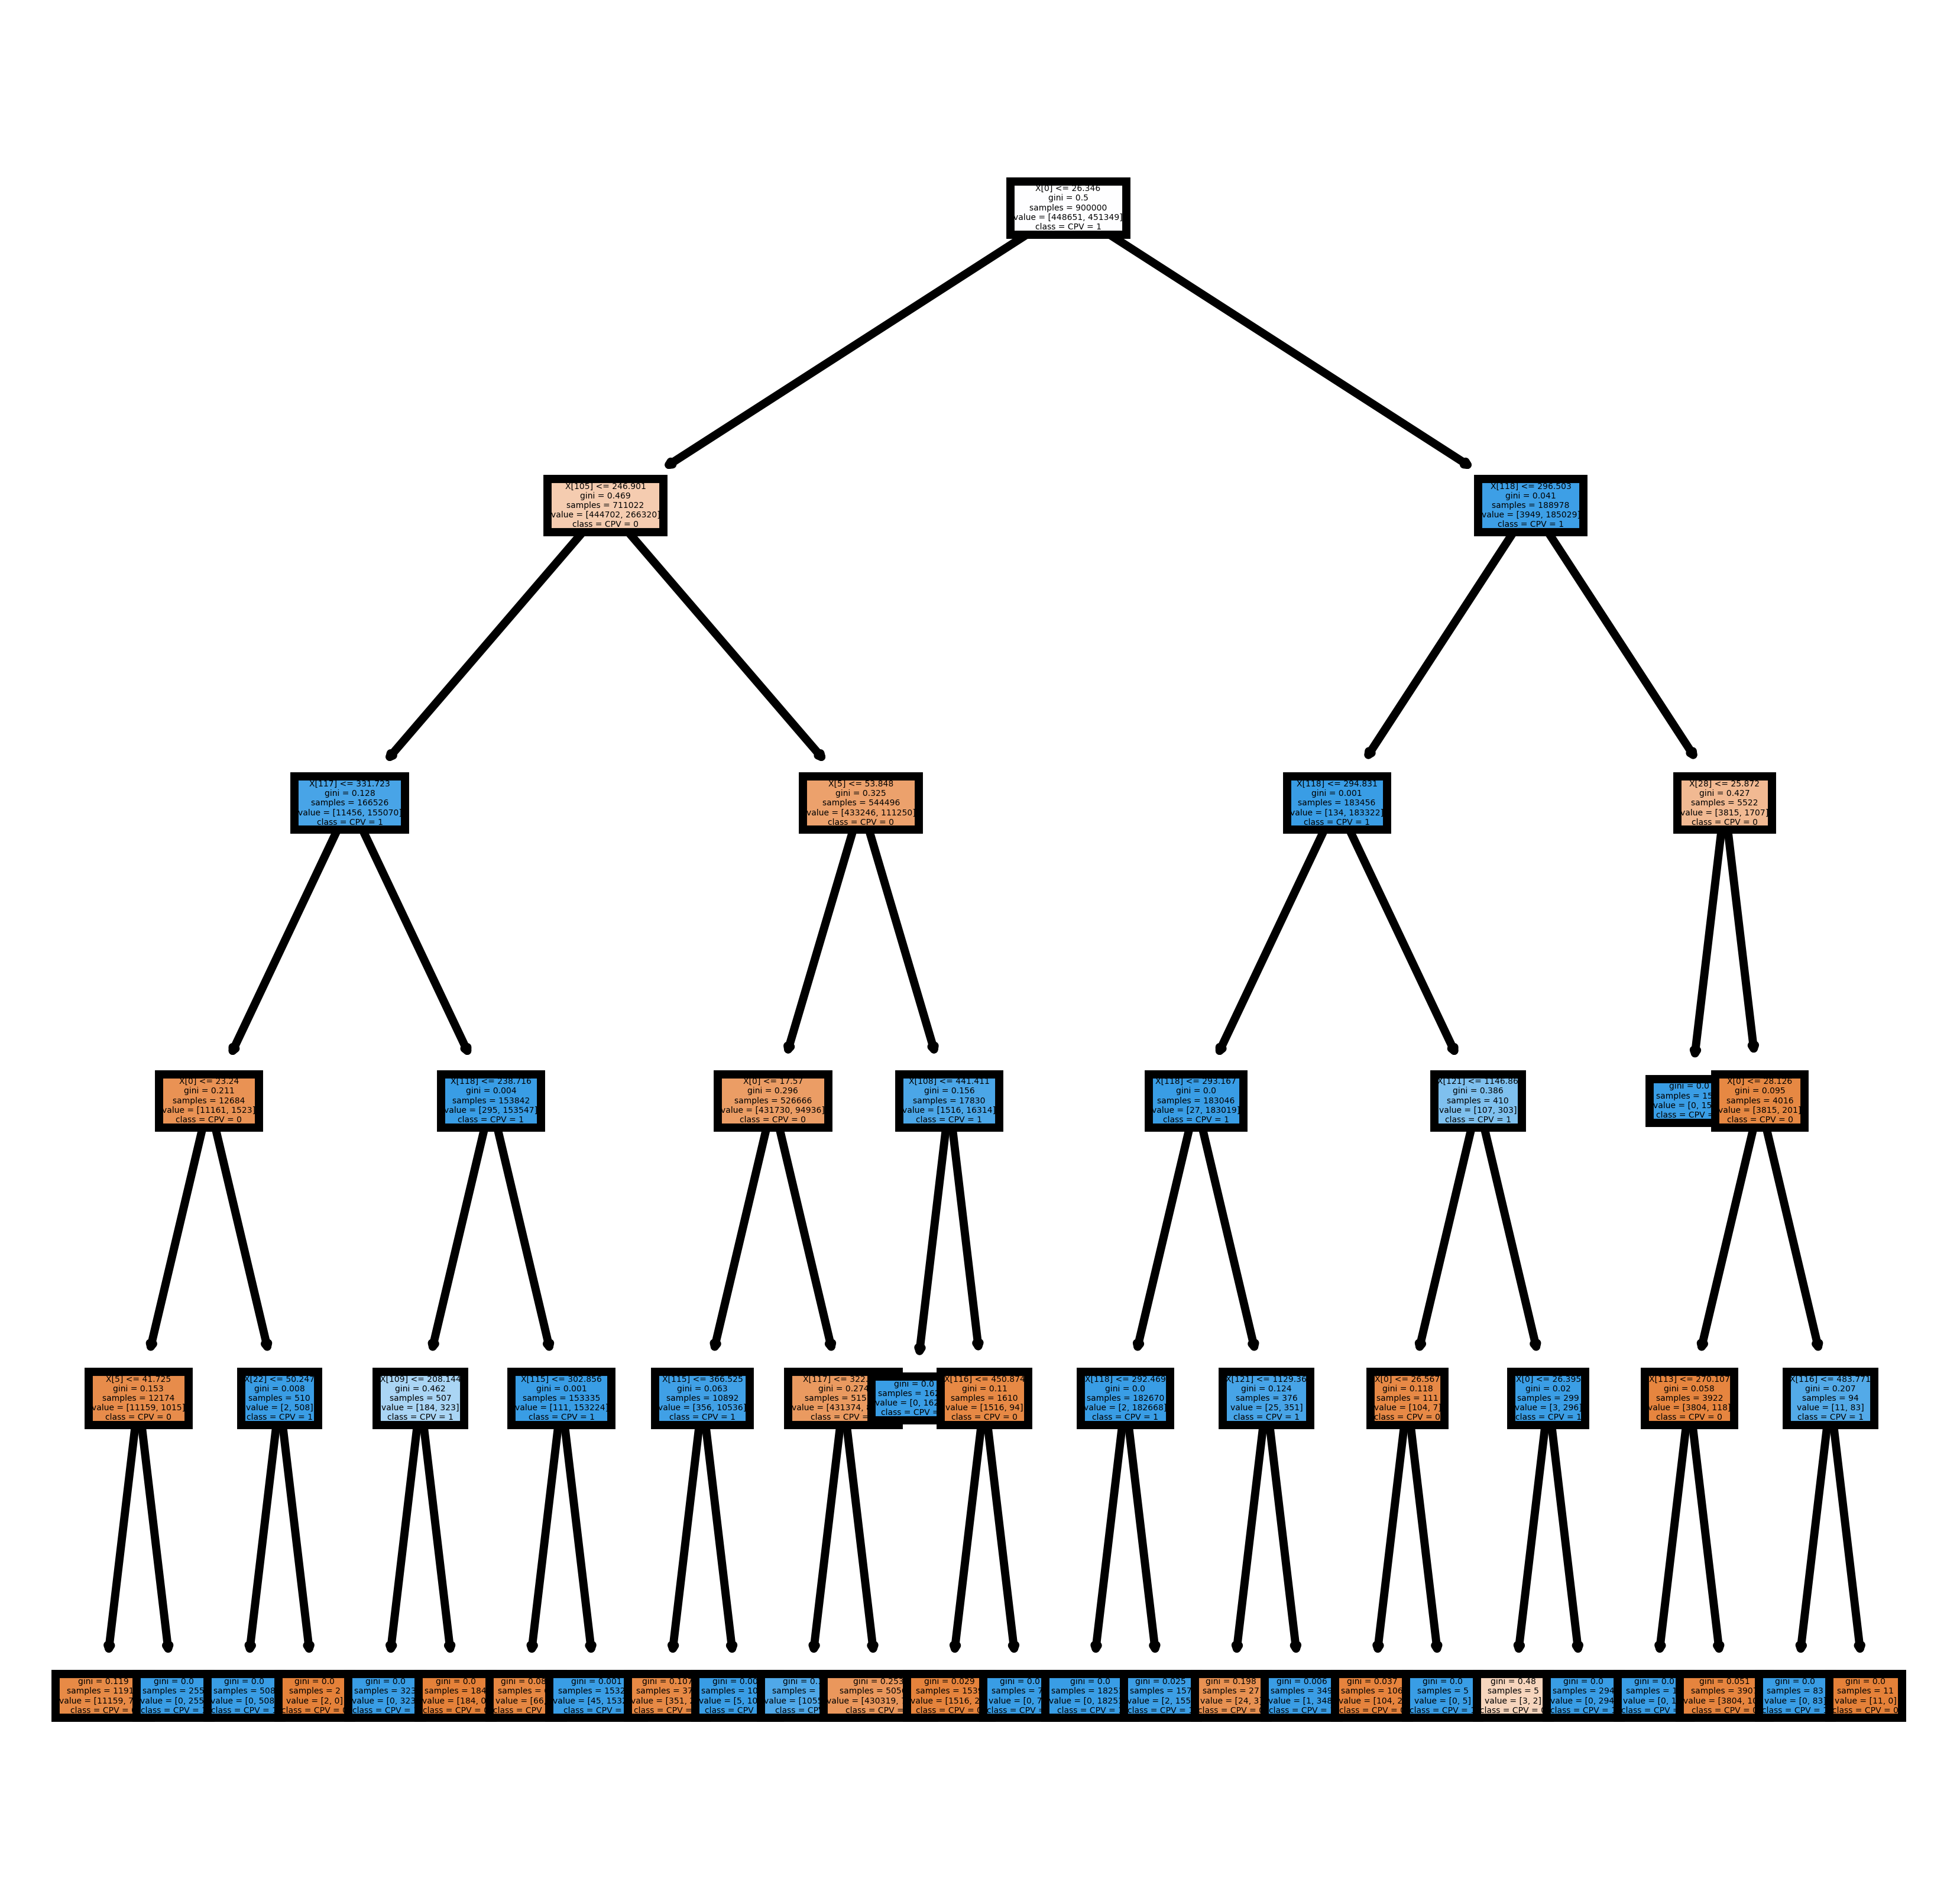

In [4]:

# Decision Tree : Spectrum ve4 & cpv

#Choose Spectrum type
v_train = ve4_train
cpv_train = cpv_train_ve4
v_test = ve4_test
cpv_test = cpv_test_ve4


# tree training
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth = 5)
tree_model.fit(v_train, cpv_train)

classes = ['CPV = 0','CPV = 1']

# Plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(tree_model, class_names = classes, filled=True)

# Evaluate model
print('Training Score: ', tree_model.score(v_train,cpv_train))
print('Testing Score: ', tree_model.score(v_test, cpv_test))


Text(0, 0.5, 'features scores')

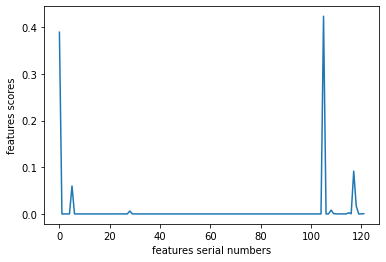

In [6]:
scores = tree_model.feature_importances_
x = range(len(scores))
plt.plot(x,scores)
plt.xlabel('features serial numbers')
plt.ylabel('features scores')